In [72]:
def explore(var, tot = 10, separator = ", ", label = ""):
  t = type(var)
  print (" %s type: %s" %(label,t))
  if t is list:
    l = len(var)
    print ("lenght:", l)
    print (*var[:tot], sep=separator ) #sep='\n')
  elif t is dict:
    mykeys = var.keys()
    l = len(mykeys)
    print ("lenght:", l)
    for k in mykeys[:tot]:
      print ("key: %i ; value: %i " %(k,var[k]))
  elif t is pd.core.frame.DataFrame:
    l = len(var)
    print ("lenght:", l)
    print (var) 
  else:
    print (*var[:tot], sep=separator)
  print ("-"*50)

In [53]:
def my_combinations_without_replacement(L,k):
  # you cannot choose the same element k times
  n = len(L)
  all_combos = []
  if n < 10:
    all_combos = [",".join(map(str, comb)) for comb in combinations(L, k)]
  num_combos = math.factorial(n) / (math.factorial(k)*math.factorial(n-k))
  num_combos2 = scipy.special.binom(n, k)
  num_combos3 = scipy.special.comb(n, k, exact=True)
  print(num_combos)
  print(num_combos2)
  print(num_combos3)
  return num_combos,all_combos

In [54]:
def my_combinations_with_replacement(L,k):
  # you can choose the same element k times
  n = len(L)
  all_combos = []
  if n < 10:
    all_combos = list(combinations_with_replacement(L, k))
  num_combos = math.factorial(n+k-1) / (math.factorial(k)*math.factorial(n-1))
  num_combos2 = scipy.special.binom(n+k-1, k)
  num_combos3 = scipy.special.comb(n+k-1, k, exact=True)
  print(num_combos)
  print(num_combos2)
  print(num_combos3)
  return num_combos,all_combos

In [63]:
def my_permutations(L,r= len(L)):
  perm = []
  n = len(L)
  if n< 100:
    perm = permutations(L,r )
  num_perm = math.factorial(n)/(math.factorial(n-r))
  print ("num_perm: ", num_perm)
  return perm, num_perm

# ref
* COMBINATIONS AND PERMUTATIONS
https://www.mathsisfun.com/combinatorics/combinations-permutations.html


* RANDOM VARIABLE EXPECTED VALUE
https://towardsdatascience.com/expected-value-of-random-variables-explained-simply-a0b02eebd9af


* OVERLEAF SYMBOLS
https://www.overleaf.com/latex/templates/symbol-table/fhqmttqvrnhk 


* EXPECTED VALUE
https://www.dartmouth.edu/~matc/DiscreteMath/I.2.pdf 


* LINEAR PROGRAMMING : https://towardsdatascience.com/linear-programming-and-discrete-optimization-with-python-using-pulp-449f3c5f6e99

# From test exam

In [58]:
import pandas as pd
import itertools
from itertools import combinations
from itertools import combinations_with_replacement
import math
from fractions import Fraction
import numpy as np
import scipy
from itertools import permutations  

## logarithms 

In [26]:
np.log(2)/6

0.11552453009332421

## permutations & combination theory

**Combinations**
- We use combinations to count the number of ways to choose a group of $r$ unordered objects from $n$ possibilities without replacement:

$$\left(\begin{array}{l}n \\ r\end{array}\right)=\frac{n !}{r !(n-r) !}$$ \\

Example: Select five players for a $\begin{array}{llll}\text { basketball team } & \text { from } & \text { a } & \text { pool of } & 20\end{array}$ candidates, for an informal pickup game. There are $\left(\begin{array}{c}20 \\ 5\end{array}\right)=\frac{20 !}{5 ! \cdot 15 !}$ ways to do this.
Pickup game in the park.

- We use combinations to count the number of ways to choose a group of $r$ unordered objects from $n$ possibilities with replacement:

$$\left(\begin{array}{l}n+r-1 \\ r\end{array}\right)=\frac{n+r-1 !}{r !(n-1) !}$$ \\


**Permutations**
- We use permutations to count the number of ways to choose a group of $r$ ordered objects from $n$ possibilities without replacement:

$$
P(n, r)=\frac{n !}{(n-r) !}
$$


In [70]:
from itertools import permutations  
r = 2 # permutations of size r
L = [1, 2, 3, 4] # from element of list L

#perm_size_r = permutations(L, r)
#print (*perm_size_r, sep = "\n")

print ("")
all_perm = permutations(L)
print (*all_perm, sep = "\n")
print ("")

perm, numperm = my_permutations(list(range(100)), r)
for i,p in enumerate(perm): 
  print (i+1,p)


(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)

num_perm:  9900.0


## unique combinations eg edge (u,v) == edge (v,u) 


In [57]:
from itertools import combinations
r = 2 # unique combinations of size r
L = [1, 2, 3, 4] # from element of list L

num_combos,all_combos = my_combinations_without_replacement(L,r) # you cannot choose the same element r times
print(all_combos)

num_combos,all_combos = my_combinations_with_replacement(L,r) # you can choose the same element r times
print(all_combos)

6.0
6.0
6
['1,2', '1,3', '1,4', '2,3', '2,4', '3,4']
10.0
10.0
10
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)]


## combinations with replacements

In [4]:
# combinations with replacement
from itertools import combinations_with_replacement
import math

n = 12
k = 3

#theory_repetition = ((n+2)*(n+1)*n)/math.factorial(k) # specific with k = 3
theory_repetition

#theory_no_repeptition = (n*(n-1)*(n-2))/math.factorial(k)# specific with k = 3
theory_no_repetition = scipy.special.binom(n, k) # general

if n <10: 
  mylist = list(range(n))
  tot_num_comb_with_repl = dict()
  for r in range(len(mylist)):
    #print ("")
    #print (r)
    all_comb_with_repl_r = list(combinations_with_replacement(mylist,r))
    #print (all_comb_with_repl_r)
    tot_num_comb_with_repl[r] = (all_comb_with_repl_r)

  print ("practical example: " ,len(tot_num_comb_with_repl[k]))
print ("theory k choose n with REPETITION binomial coeff: ",theory_repetition)
print ("theory k choose n withOUT REPETITION binomial coeff: ",theory_no_repetition)

theory k choose n with REPETITION binomial coeff:  364.0
theory k choose n withOUT REPETITION binomial coeff:  220.0


In [10]:
K = list(range(100))
input = list(range(1,9))
input = [i/10 for i in input]
mydict_num= dict()
for i in input: 
  i_list = [(i)**k for k in K]
  mydict_num[i] = i_list

pd.DataFrame.from_dict(mydict_num)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.000000e-01,2.000000e-01,3.000000e-01,4.000000e-01,5.000000e-01,6.000000e-01,7.000000e-01,8.000000e-01
2,1.000000e-02,4.000000e-02,9.000000e-02,1.600000e-01,2.500000e-01,3.600000e-01,4.900000e-01,6.400000e-01
3,1.000000e-03,8.000000e-03,2.700000e-02,6.400000e-02,1.250000e-01,2.160000e-01,3.430000e-01,5.120000e-01
4,1.000000e-04,1.600000e-03,8.100000e-03,2.560000e-02,6.250000e-02,1.296000e-01,2.401000e-01,4.096000e-01
...,...,...,...,...,...,...,...,...
95,1.000000e-95,3.961408e-67,2.120895e-50,1.569275e-38,2.524355e-29,8.401731e-22,1.924482e-15,6.216540e-10
96,1.000000e-96,7.922816e-68,6.362685e-51,6.277102e-39,1.262177e-29,5.041039e-22,1.347137e-15,4.973232e-10
97,1.000000e-97,1.584563e-68,1.908806e-51,2.510841e-39,6.310887e-30,3.024623e-22,9.429961e-16,3.978586e-10
98,1.000000e-98,3.169127e-69,5.726417e-52,1.004336e-39,3.155444e-30,1.814774e-22,6.600972e-16,3.182869e-10


## all combinations of two lists

In [22]:
# all combinations of elements of two lists of length m and n = m*n

In [18]:
# range from 1 to 10
n = 10
list1 = list(range(1,n+1))
list2 = list(range(1,n+1))

In [19]:
explore(list1)
explore(list2)

type: <class 'list'>
lenght: 10
1, 2, 3, 4, 5, 6, 7, 8, 9, 10
--------------------------------------------------
type: <class 'list'>
lenght: 5
1, 2, 3, 4, 5
--------------------------------------------------


In [20]:
# all the combinations between two lists (0,1)...(0,9), (1,0)....
output = list(itertools.product(list1, list2))
c = [a*10+ b for (a,b) in output]
explore(output, tot= len(output), separator = "\n")


# create df from lists
df = pd.DataFrame(
    {'(a,b)': output,
     'c': c,
    })
df

type: <class 'list'>
lenght: 50
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
--------------------------------------------------


,"(a,b)",c
0,"(1, 1)",11
1,"(1, 2)",12
2,"(1, 3)",13
3,"(1, 4)",14
4,"(1, 5)",15
5,"(2, 1)",21
6,"(2, 2)",22
7,"(2, 3)",23
8,"(2, 4)",24
9,"(2, 5)",25


In [92]:
# keep rows from df 
df = df[df["c"] % 2 == 0] # keep only even c
#df = df[df["c"] % 2 != 0] # keep only odd c

# add column to df
df["p_frac"] = [Fraction(1,len(df)) for element in df["c"]]
df["p"] = [1/len(df) for element in df["c"]]

In [ ]:
explore(df)

In [109]:
list_tuples = list(zip(df["c"],df["p"]))
#for mys,myp in list_tuples:
    #print (mys,myp)
#summing = [(mys*myp) for (mys,myp) in list_tuples]
E_X = sum([(mys*myp) for (mys,myp) in list_tuples])
E_X

61.0

In [145]:
# count occurrences in a list into a dictionary
from collections import Counter
count_dict = dict(Counter(df["c"]))
count_dict[42]

1

# 1- Formal Languages

Ex1.1

> https://www.sciencedirect.com/topics/mathematics/adjacency-matrix#:~:text=The%20adjacency%20matrix%20of%20a,the%20adjacency%20matrix%20is%20symmetric. 

a) An undirected graph with n nodes can be rapresented by an adjacency matrix n*n, where all the values above the diagonal are the same as above the diagonal (matrix is symmetric). Also all the values on the diagonal are zero because there are no loops, therefore all the edges of the inderected graph are rapreseted by $((n^2)-n)/2 $ elements. For a word to encode such a graph, its lenght k has to be equal to $(n*(n-1))/2$.

b) The graph is coded row wise (just the chosen convention), 
* first n − 1 letters are the entries of the ﬁrst row of the adjacency matrix to the right of the diagonal. 
* next n − 2 letters are the entries of the second row to the right of the diagonal
* n-i with i as row index, from i move to the right of $(j-i)$ places, if = 0 no edge, elif = 1, edge exists.

---


Ex1.2.
Language for DIRECTED GRAPH is the same as per undirected graph, but the matrix is not symmetric and there might be loops. 

$$
L_{g r a p h s}=\bigcup_{n=0}^{\infty}\{0,1\}^{2}=\left\{w \in\{0,1\}^{k} \mid \exists n \in \mathbb{N}: k=n^2 \right\}
$$


---

Ex1.3. 

We are designing the language for fractions which are quotients of two integers.

* Specify the alphabet $\Sigma_{\mathrm{IP}}$ you use.}
$\Sigma_{\mathrm{hg}} = \{0,1, \ldots, 9,-,+,div\}$ 
* Specify how the language $L_{\mathrm{IP}}$ is defined. 
We map each fraction to : sign of the fraction, decimal expantion of a, div, decimal expantion of b. We dont need separators such as commas of hashtags because each fraction starts with + or -
$$
* +1div3+234div39-55div16



---
Ex1.4.

Design language for dijunctive form language, is similar to:

Example $2.4[$ Coding of clauses $]$ Let a non-empty set $C=\{c_1, \ldots, c_k\}$ of clauses over the boolean variables $x 1, \ldots, x \quad$ nbe given. We code this set by listing the indices of the variables of each clause and indicating for each one whether it is negated or not by a leading - resp. $+$. We also use a special symbol # to separate the clauses. Hence, our alphabet is $\Sigma_{c}=\{0,1,2,3,4,5,6,7,8,9, \#,+,-\}$

but the interpretation of the word is different.


Monomials are connected by disjunctions and not juctions form, therefore the # between two monomials would mean "OR".

* n = number of variables $x_1, \ldots,x_n$
* k = number of monomials 

> -1+2+3#-1+4#+1-3+4+5#+2-3-5





# 2- Decision Algorithms A_d to Optimization algorithms A_o

Ex2.1


A) describe Optimization Algorithm 
**Phase 1:**
Find the k* which is the maximum cardinality , by binary or linear search.

BINARY SEARCH: 
* Set $k \leftarrow n,$ where $n=|V| / 2$
* Call the black box $A_{\mathrm{d}}$ with input $(G, k)$ 
  * If $A_{\mathrm{d}}(G, k)=\mathrm{YES}$ * set $k$ to the average of the previous $k$ and an upper bound on the largest clique size (initially $n$ )
  * else set $k$ to the average of the previous $k$ and a lower bound on the largest clique size (initially 0 ). 
* Proceed accordingly, updating upper and lower bounds until the interval of possible values has been narrowed down to 1 element.
Then $k$ is the size of a maximum clique.

LINEAR SEARCH
Alternatively, one could use a linear search, 
counting $k$ down from $n$ until $A_{\mathrm{d}}$ answers YES for the first time.


**Phase 2:**
for each pair of vertices u,v:
* put in V' the edge(u,v)
* call A_d(G,k) on the graph with the new edge
* if output is YES than keep the edge
* else if output is NO take away the edge and mark it as crucial
* at the end output the list of crucial edges


B) argue correctness.
Binary search will identify correctly the max cardinality correctly. Calling A_d with (G,k) if the answer is YES it still exists an independent set of cardinality k, if NO the newly added edge is connecting vertices that would have been otherwise.

C) Under the hp that the call A_o is 1 computational step.
Time complexity of Binary search is O(log n), time complexity of checking all couples of vertices is O(n^2), there fore the running time is O(n^2) in polynomial time.
  



---


Ex2.2
no it is not, because any graph as min clique size of 2, so the solution would be always YES. 



---



Ex2.3

A)
* Find the k* which is minimum number of tests by binary search.
for each test: 
* Call A_d (all tests- T_i, k*)
* if NO, put the test back
* if YES, remove and continue 

B) Selecting the test that covers more error until all errors are covered is GREEDY algorithm that does NOT work.

EG:
E = e1,e2,e3,e4,e5,e6
T1= e1,e2,e3,e4
T2= e1,e3,e5
T3= e2,e4,e6

would select T1, T2 and T3, whereas the optimal would be: T2,T3



---

Ex2.4

POLYNOMIAL TIME
with input size n
> polynomial running time: $n^a$ with a> 0 \\
> (1.1) $n^a \leq t_0$ \\

if the speed is doubled , then the time to compute with input size $c_p n$
> (1.2) $(c_p n)^a \leq 2t_0$ \\

Using (1.1) in (1.2) one gets:
> $c_p \leq 2^{1/a}$  \\


EXPONENTIAL RUNNING TIME
> exponential running time: $b^n$ with b >1 \\
> (2.1) $b^n \leq t_0$ \\

f the speed is doubled , then the time to compute with input size $c_p n$
> (2.2) $b ^{c_e +n} \leq 2t_0$ \\

applying logarithm property to get:

> $c_e \leq ln(2)/ln(b)$  \\


# 3 - Probabilities

### Expected value

Let $X$ be a random variable which takes values in a finite (or countable) set $S=$ $\left\{s_{1}, \ldots, s_{n}\right\} .$ Then the expectation $\boldsymbol{E}[X]$ of $X$ is the "theoretical average" of the outcomes:
$$
\boldsymbol{E}[X]=\sum_{i=1}^{n} \boldsymbol{P}\left[X=s_{i}\right] \cdot s_{i}=\sum_{i=1}^{n} p_{i} s_{i}
$$
Example: Let $X$ be the fair die. Then the expectation is:
$$
\boldsymbol{E}[X]=\sum_{i=1}^{6} p_{i} s_{i}=\sum_{i=1}^{6} \frac{1}{6} i=\frac{1}{6} \sum_{i=1}^{6} i=\frac{1}{6} 21=3,5
$$


In [163]:
def expected_value(values, proabilities):
  list_tuples = list(zip(values,proabilities))
  expected = sum([(mys*myp) for (mys,myp) in list_tuples])
  return expected

In [199]:
def print_df(output,Z, labels, pZ = None):


  # create df from lists
  df = pd.DataFrame(
        {'%s'%labels[0]: output,
        '%s'%labels[1]: Z,
        })
  print ("")

  if pZ == None: 
    # add column to df
    df["p_frac"] = [Fraction(1,len(df)) for element in df['%s'%labels[1]]]
    df["p"] = [1/len(df) for element in df['%s'%labels[1]]]
  else: 
    df["p"] = pZ
    df["p_frac"] = [Fraction(pz) for pz in pZ]

  #_____________________________________________________________________________________
  print ("")
  print (df.head(num_outputs))
  print ("")


  #_____________________________________________________________________________________
  # are there repeated values? 
  print ("unique possible values of '%s: %s " %(labels[1],set(Z)))

  # calculate expected value (all values, probability of values)
  E_Z = expected_value(Z, pZ)
  print ("expected value of %s: %s "%(labels[1],E_Z))
  print ("")

## from Exercises

#### EX 3.1, expected value of discrete random variables 

In [204]:
# EX 3.1


pX = [1/3,1/2,1/6]
X = [0,2,3]
dict_x = dict(zip(X, pX))
E_X = expected_value(X, pX)
print ("expected value of X: ", E_X)
print ("")

pY = [1/4,1/4,1/2]
Y = [0,5,6]
dict_y = dict(zip(Y, pY))
E_Y = expected_value(Y, pY)
print ("expected value of Y: ", E_Y)
print ("")

output = list(itertools.product(X, Y))
num_outputs = len(output)
explore(output,tot = len(output), separator = "\n")

#_____________________________________________________________________________________
Z = [u*v for u,v in output]
pZ = [dict_x[u]*dict_y[v]for u,v in output]

dict_z = dict(zip(Z, pZ))
frac_pZ = [Fraction(pz) for pz in pZ]

# create df from lists
df = pd.DataFrame(
    {'(a,b)': output,
     'Z': Z,
     'pZ': pZ,
     'frac pZ':frac_pZ
    })
print ("")

print ("")
print (df.head(num_outputs))
print ("")

# are there repeated values? 
print ("unique possible values of Z: %s " %set(Z))

# calculate expected value (all values, probability of values)
E_Z = expected_value(Z, pZ)
print ("expected value of Z: ", E_Z)
print ("")
print ("with linearity of expectations:")
print ("E(Z)= E(X) *E(Y) = %s *%s = %s" %(E_X,E_Y,E_X*E_Y))
#_____________________________________________________________________________________


expected value of X:  1.5

expected value of Y:  4.25

type: <class 'list'>
lenght: 9
(0, 0)
(0, 5)
(0, 6)
(2, 0)
(2, 5)
(2, 6)
(3, 0)
(3, 5)
(3, 6)
--------------------------------------------------


    (a,b)   Z        pZ                              frac pZ
0  (0, 0)   0  0.083333   6004799503160661/72057594037927936
1  (0, 5)   0  0.083333   6004799503160661/72057594037927936
2  (0, 6)   0  0.166667   6004799503160661/36028797018963968
3  (2, 0)   0  0.125000                                  1/8
4  (2, 5)  10  0.125000                                  1/8
5  (2, 6)  12  0.250000                                  1/4
6  (3, 0)   0  0.041667  6004799503160661/144115188075855872
7  (3, 5)  15  0.041667  6004799503160661/144115188075855872
8  (3, 6)  18  0.083333   6004799503160661/72057594037927936

unique possible values of Z: {0, 10, 12, 15, 18} 
expected value of Z:  6.375

with linearity of expectations:
E(Z)= E(X) *E(Y) = 1.5 *4.25 = 6.375


In [200]:
Z = [u*v for u,v in output]
labels = ["(a,b)","Z"]
print_df(output,Z, labels, pZ)



    (a,b)   Z         p                               p_frac
0  (0, 0)   0  0.083333   6004799503160661/72057594037927936
1  (0, 5)   0  0.083333   6004799503160661/72057594037927936
2  (0, 6)   0  0.166667   6004799503160661/36028797018963968
3  (2, 0)   0  0.125000                                  1/8
4  (2, 5)  10  0.125000                                  1/8
5  (2, 6)  12  0.250000                                  1/4
6  (3, 0)   0  0.041667  6004799503160661/144115188075855872
7  (3, 5)  15  0.041667  6004799503160661/144115188075855872
8  (3, 6)  18  0.083333   6004799503160661/72057594037927936

unique possible values of 'Z: {0, 10, 12, 15, 18} 
expected value of Z: 6.375 



In [206]:
Zplus2 = [z+2 for z in Z]
labels = ["Z","2+ Z"]
print_df(Z,Zplus2, labels, pZ)
print ("with linearity of expectations:")
print ("E(2+Z)=2+E(Z) = 2+ %s = %s" %(E_Z,E_Z+2))



    Z  2+ Z         p                               p_frac
0   0     2  0.083333   6004799503160661/72057594037927936
1   0     2  0.083333   6004799503160661/72057594037927936
2   0     2  0.166667   6004799503160661/36028797018963968
3   0     2  0.125000                                  1/8
4  10    12  0.125000                                  1/8
5  12    14  0.250000                                  1/4
6   0     2  0.041667  6004799503160661/144115188075855872
7  15    17  0.041667  6004799503160661/144115188075855872
8  18    20  0.083333   6004799503160661/72057594037927936

unique possible values of '2+ Z: {2, 12, 14, 17, 20} 
expected value of 2+ Z: 8.374999999999998 

with linearity of expectations:
E(2+Z)=2+E(Z) = 2+ 6.375 = 8.375


In [207]:
Ztimes2 = [z*2 for z in Z]
labels = ["Z","2 * Z"]
print_df(Z,Ztimes2, labels,pZ)
print ("with linearity of expectations:")
print ("E(2*Z)=2*E(Z) = 2+ %s = %s" %(E_Z,E_Z*2))



    Z  2 * Z         p                               p_frac
0   0      0  0.083333   6004799503160661/72057594037927936
1   0      0  0.083333   6004799503160661/72057594037927936
2   0      0  0.166667   6004799503160661/36028797018963968
3   0      0  0.125000                                  1/8
4  10     20  0.125000                                  1/8
5  12     24  0.250000                                  1/4
6   0      0  0.041667  6004799503160661/144115188075855872
7  15     30  0.041667  6004799503160661/144115188075855872
8  18     36  0.083333   6004799503160661/72057594037927936

unique possible values of '2 * Z: {0, 36, 20, 24, 30} 
expected value of 2 * Z: 12.75 

with linearity of expectations:
E(2*Z)=2*E(Z) = 2+ 6.375 = 12.75


In [212]:
twoPowerZ = [2**z for z in Z]
labels = ["Z","2 ** Z"]
print_df(Z,twoPowerZ, labels,pZ)

print ("with \sum (2**Z[i])*pZ[i] : ", sum([(2**Z[i])*pZ[i] for i in range(len(Z))]))



    Z  2 ** Z         p                               p_frac
0   0       1  0.083333   6004799503160661/72057594037927936
1   0       1  0.083333   6004799503160661/72057594037927936
2   0       1  0.166667   6004799503160661/36028797018963968
3   0       1  0.125000                                  1/8
4  10    1024  0.125000                                  1/8
5  12    4096  0.250000                                  1/4
6   0       1  0.041667  6004799503160661/144115188075855872
7  15   32768  0.041667  6004799503160661/144115188075855872
8  18  262144  0.083333   6004799503160661/72057594037927936

unique possible values of '2 ** Z: {1024, 1, 4096, 32768, 262144} 
expected value of 2 ** Z: 24363.166666666664 

with \sum (2**Z[i])*pZ[i] :  24363.166666666664


#### EX 3.2, expected value of uniformly distributed random variable


In [226]:
# x  = U{0,1} 
# {} means only the values in the parenthesis**
# [ ] means infinite values in the parenthesis
a,b = 0,1
X = [0,1] # this is the equivalent of **
pX = [0.5,0.5]
E_x = (a+b)/2
E_X = expected_value(X,pX)
print ("E[x]: %s"%(expected_value(X,pX)))
print ("for linearity of expectation: ")
print ("E[0.5+x]: %s"%(expected_value([0.5+x for x in X],pX)))
print ("E[0.5x]: %s"%(expected_value([0.5*x for x in X],pX)))
print ("for base**X with X uniformly distributed variable we CANNOT use linearity of expectation")
print ("E[(0.5)**x]: %s"%(sum([(0.5**X[i])*pX[i] for i in range(len(X))])))

E[x]: 0.5
for linearity of expectation: 
E[0.5+x]: 1.0
E[0.5x]: 0.25
for base**X with X uniformly distributed variable we CANNOT use linearity of expectation
E[(0.5)**x]: 0.75


#### Ex 3.3: probability and expected value of snippet algorithm

In [224]:
import random as myrand

num_tests = 10**4
myoutcomes = []
for j in list(range(num_tests)):
  i = -9
  while myrand.choice(list(range(1,10))) != myrand.choice(list(range(1,10))):
    i+=1
  myoutcomes.append(i)

results_dictionary = dict(Counter(myoutcomes))
average = sum(k*v for k,v in results_dictionary.items())/sum(results_dictionary.values())
average

-1.1297

We have a loop. 
* var_1 is the random of the first.
* var_2 is the random of the second.

in total we have how many cases? 
10 possible X
10 possible Y

total cases = 10 *10 = 100

In [237]:
# range from 1 to 10
n = 10
list1 = list(range(1,n+1))
list2 = list(range(1,n+1))

output = list(itertools.product(list1, list2))
#condition: a = b
c = [a == b for (a,b) in output]
#explore(output, tot= len(output), separator = "\n")


# create df from lists
df = pd.DataFrame(
    {'(a,b)': output,
     'c': c,
    })
print (df)
print ("-"*50)
df_true = df[df['c'] == True]
print (df_true)
print ("-"*50)

print ("condition is satisfied %s/%s times" %(len(df_true),len(df)) )

       (a,b)      c
0     (1, 1)   True
1     (1, 2)  False
2     (1, 3)  False
3     (1, 4)  False
4     (1, 5)  False
..       ...    ...
95   (10, 6)  False
96   (10, 7)  False
97   (10, 8)  False
98   (10, 9)  False
99  (10, 10)   True

[100 rows x 2 columns]
--------------------------------------------------
       (a,b)     c
0     (1, 1)  True
11    (2, 2)  True
22    (3, 3)  True
33    (4, 4)  True
44    (5, 5)  True
55    (6, 6)  True
66    (7, 7)  True
77    (8, 8)  True
88    (9, 9)  True
99  (10, 10)  True
--------------------------------------------------
condition is satisfied 10/100 times


#### expected running time 
The expected running time of a randomized algorithm is computed with respect to the algorithms internal randomization. It is the expected value of the (random) running time.
$$
E [X]=\sum_{n=0}^{\infty} P[X=n] \cdot n
$$


Using the formula $\sum_{n=0}^{\infty} n \cdot q^{n}=\frac{q}{(1-q)^{2}}$ with $q=1 / 2$ we have:
$$
\begin{aligned}
\sum_{n=0}^{\infty} n \cdot\left(\frac{1}{2}\right)^{n+1} &=\frac{1}{2} \sum_{n=0}^{\infty} n \cdot\left(\frac{1}{2}\right)^{n} \\
&=\frac{1}{2} \frac{1 / 2}{(1-1 / 2)^{2}}=\frac{1}{2} \frac{1 / 2}{1 / 4}=1
\end{aligned}
$$

- Running time is $t$ if first $t-1$ failures happen, and then success. This has probability $(1-p)^{t-1} p$
- Expected running time 
$$E[X]=\sum_{t=1}^{\infty} t P [X=t]=\sum_{t=1}^{\infty} t \cdot(1-p)^{t-1} \cdot p$$

In [271]:
# X random variable = number of times smth is executed
# P[X = 0] = 1/10
# P[X = 1] = (1/10) *(9/10) = 9/100
# P[x = n] = (9/10)^(n-1) *(1/10)
waiting_time  =10/9
waiting_time

1.1111111111111112

probability that the condition is not satisfied once: 
> p = 9/10

probability tha the codition is not satisfied once and satisfied the second time: 
> p = (9/10)*(1/10)

probability that the condition is not satisfied 12 times and satisfied the 13th time
> p = ((9/10)^12 )*(1/10)

value 3 is printed if running time is 12. 
Given p_success = 1/10 we have: 

In [240]:
p_success = 1/10
t = 12

((1-p_success)**(t))*p_success

0.028242953648100012

In [265]:
T = list(range(0,10))
K = [t- 9 for t in T]
p_fail = [(0.9)**t for t in T]
p_succ = [0.1]*len(T)

# create df from lists
dfboh = pd.DataFrame(
    {'k': K,
     'p_fail': p_fail,
     "p_succ": p_succ
    })
print (dfboh.head(13))

   k    p_fail  p_succ
0 -9  1.000000     0.1
1 -8  0.900000     0.1
2 -7  0.810000     0.1
3 -6  0.729000     0.1
4 -5  0.656100     0.1
5 -4  0.590490     0.1
6 -3  0.531441     0.1
7 -2  0.478297     0.1
8 -1  0.430467     0.1
9  0  0.387420     0.1


In [277]:
max_value = 10**6
all_indexes = list(range(-9,max_value))
all_t = [i+9 for i in all_indexes]
all_prob = [((1-p_success)**(t))*(p_success) for t in all_t]
ixp = [all_prob[idx]*i for idx,i in enumerate(all_indexes)]
# create df from lists
df = pd.DataFrame(
    {'i': all_indexes,
     't': all_t,
     'p': all_prob,
     'com p': list(np.cumsum(all_prob)),
     'i * p': ixp,
     'E(x)': list(np.cumsum(ixp))
    })
print (df.head(13))
print ("")
print ("empirical expected value: %s " %(df.tail(1)["E(x)"]))
#sum([all_indexes[j]*all_prob[j] for j in range(len(all_indexes))])

    i   t         p     com p     i * p      E(x)
0  -9   0  0.100000  0.100000 -0.900000 -0.900000
1  -8   1  0.090000  0.190000 -0.720000 -1.620000
2  -7   2  0.081000  0.271000 -0.567000 -2.187000
3  -6   3  0.072900  0.343900 -0.437400 -2.624400
4  -5   4  0.065610  0.409510 -0.328050 -2.952450
5  -4   5  0.059049  0.468559 -0.236196 -3.188646
6  -3   6  0.053144  0.521703 -0.159432 -3.348078
7  -2   7  0.047830  0.569533 -0.095659 -3.443738
8  -1   8  0.043047  0.612580 -0.043047 -3.486784
9   0   9  0.038742  0.651322  0.000000 -3.486784
10  1  10  0.034868  0.686189  0.034868 -3.451917
11  2  11  0.031381  0.717570  0.062762 -3.389154
12  3  12  0.028243  0.745813  0.084729 -3.304426

empirical expected value: 1000008    1.529373e-15
Name: E(x), dtype: float64 


In [8]:
start_idx = -9
p_succ = 0.1
p_fail = 1-p_succ

(p_fail/p_succ)+ start_idx

0.0

In [9]:
start_idx = +2.5
p_succ = 0.5
p_fail = 1-p_succ

(p_fail/p_succ)+ start_idx


3.5

#### Exercise 3.4 worst case running time and expected running time algorithms

In [ ]:
A = [1,2,3,4]
B = [1,2,3]

Possible algorithm for A: tossing the fair coin twice.

* HH = 1
* HT = 2
* TH = 3
* TT = 4

Possible algorithm for B: tossing the fair coin 2^10 times

success is (3/4) so the waiting time is (4/3)


In geometrical distribution when the probability of success is p, the waiting time to observe success is 1/p. 

#### Ex 3.5 every YES-NO problem is in BPP*

successs probability >= 0.5


it is not usefull to have a success proabability >= 0.5 because you can just toss a coin and get the same result.


# 4 -Classes of problems (RP, BPP, NP...)


#### Ex4.1 

given a graph with n vertices, we have to show that the algorithm given belongs to RP.

**The Class $\mathcal{R} \mathcal{P}$**

A yes-no-problem is in $\mathcal{R} \mathcal{P}$ (random polynomial time) if there is a polynomial $p$ and a randomized $p$ -bounded algorithm $A$ such that for every input $X$ the following holds:

* True answer for $\boldsymbol{X}$ is YES then $\boldsymbol{P}_{R}[A(\boldsymbol{X}, R)=\mathrm{YES}] \geq \frac{1}{2}$
* True answer for $\boldsymbol{X}$ is $\mathrm{NO}$ then $\boldsymbol{P}_{R}[A(\boldsymbol{X}, R)=\mathrm{NO}]=1$


An algorithm with these properties is called an $\mathcal{R} \mathcal{P}$ -algorithm.
$\mathcal{R} \mathcal{P}$ -algorithms are also called **Monte Carlo algorithms**. They have one-sided error. In contrast to $\mathcal{N} \mathcal{P}$ -algorithms, there is a good chance of getting the correct result for YES-inputs.

# 5- Knapsack Problem

In [104]:
import numpy as np
from pprint import pprint
import timeit
from timeit import default_timer as timer

arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

[[1 2 3]
 [4 5 6]]


## O(nB) solution 

In [346]:
def knapSack_nB(n,B,W,lists,print_statement = True): 
  #create empty array
  num_rows = n+1 # index i= 1...num_rows
  num_col = B+1 # index w = 1... num_col

  V = [["-"]*(num_col) for _ in range(num_rows)]
  if print_statement == True:
    pprint(V)
    print ("")

  # initialization
  for w in range(num_col):
    V[0][w] = 0.0
  for i in range(num_rows):
    V[i][0] = 0.0

  if print_statement == True:
    pprint(V)
    print ("")
  # filling the table

  list_objects = []

  for i in range(0,num_rows-1):
    for w in range(0,num_col):
      #print ("cell (%s,%s)" %(i+1,w))
      if W[i] <= w:
        #print ("object %s used to achieve the max value" %(i-1))
        first_term = V[i][w]
        second_term = lists[i] + V[i][w-W[i]]
        #print (first_term)
        #print (second_term)
        if second_term > first_term:
          #print ("appending %s"%(i+1))
          list_objects.append(i+1)
        else: 
          if i in list_objects:
            list_objects.remove(i)
        V[i+1][w] = max(lists[i] + V[i][w-W[i]],  V[i][w])
      else: 
        #print ("object %s CANNOT be used to achieve the max value" %(i-1))
        V[i+1][w] = V[i][w]
      if print_statement == True:
        pprint(V)
        print ("")
  
  return V,list_objects

In [357]:
def format_nB(V):
  Vf = V.copy()
  num_rows = len(V)
  num_col = len(V[0])
  # initialization
  for i in range(num_rows):
    for s in range(num_col):
      value = V[i][s]
      if value == "-":
        Vf[i][s] = "-"
      else:
        Vf[i][s] = (int(value))
  
  return Vf

In [402]:
def find_objecs(V,n,B,lists,W ,alg = "nB"):
    """
    alg = "nB"  or "nS"
    """
    # stores the result of Knapsack 
    res = V[n][B] 
    if alg == "nB":
      print("O(nB); max obtainable value: ", res) 
    elif alg == "nS":
      print("O(nS); max weight: ", res) 
    print ("")
      
    w = B
    for i in range(n, 0, -1): 
        if res <= 0: 
            break
        # either the result comes from the 
        # top (K[i-1][w]) or from (val[i-1] 
        # + K[i-1] [w-wt[i-1]]) as in Knapsack 
        # table. If it comes from the latter 
        # one/ it means the item is included. 
        #print (i,w)
        try:
          test = V[i - 1][w]
        except Exception as e:
          print (e)
          break
        else:
          if res == V[i - 1][w]: 
              continue
          else: 
    
              # This item is included. 
              print("object with weight: %s and value %s" %(W[i - 1],lists[i - 1] ))  # this is the weight!
                
              # Since this weight is included 
              # its value is deducted 
              res = res - lists[i - 1] 
              w = w - W[i - 1]

In [381]:
n = 6 #number of objects
B = 11 # max knapsack capacity
W = [4, 1, 7, 5, 2, 2]# weights
lists = [6, 8, 4, 9, 3, 5]# values
S = sum(lists)

initial_df = pd.DataFrame(list(zip(W, lists)), 
               columns =['weights', 'values'])
print (initial_df)

#n = 4, W = {2, 4, 3, 1}, S = {3, 4, 2, 1}, B = 6. 
# Driver program to test above function 
start = timer()
V,list_objects = knapSack_nB(n,B,W,lists, print_statement = False)
end = timer()
print ("")
print("computation time: " ,end - start)
print ("")
print ("max obtainable value: ",V[n][B])
find_objecs(V,n,B,lists,W)
#print ("objects: ",list_objects)

V = format_nB(V)
df = pd.DataFrame.from_records(V)
df


   weights  values
0        4       6
1        1       8
2        7       4
3        5       9
4        2       3
5        2       5

computation time:  0.00016652199701638892

max obtainable value:  25.0
max obtainable value:  25.0

object with weight: 2 and value 5
object with weight: 2 and value 3
object with weight: 5 and value 9
object with weight: 1 and value 8


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,6,6,6,6,6,6,6,6
2,0,8,8,8,8,14,14,14,14,14,14,14
3,0,8,8,8,8,14,14,14,14,14,14,14
4,0,8,8,8,8,14,17,17,17,17,23,23
5,0,8,8,11,11,14,17,17,20,20,23,23
6,0,8,8,13,13,16,17,19,22,22,25,25


In [403]:
n = 4#number of objects
B = 6 # max knapsack capacity
W = [2, 4, 3, 1]# weights
lists = [3, 4, 2, 1]# values
S = sum(lists)

initial_df = pd.DataFrame(list(zip(W, lists)), 
               columns =['weights', 'values'])
print (initial_df)

#n = 4, W = {2, 4, 3, 1}, S = {3, 4, 2, 1}, B = 6. 
# Driver program to test above function 
start = timer()
V,list_objects = knapSack_nB(n,B,W,lists, print_statement = False)
end = timer()
print("computation time: " ,end - start)
print ("")
print ("max obtainable value: ",V[n][B])

find_objecs(V,n,B,lists,W)

V = format_nB(V)
df = pd.DataFrame.from_records(V)
df


   weights  values
0        2       3
1        4       4
2        3       2
3        1       1
computation time:  0.0001093540049623698

max obtainable value:  7.0
O(nB); max obtainable value:  7.0

object with weight: 4 and value 4
object with weight: 2 and value 3


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,3,3,3,3,3
2,0,0,3,3,4,4,7
3,0,0,3,3,4,5,7
4,0,1,3,4,4,5,7


## O(ns) solution , good for small values

In [314]:
def format_nS(V,myceiling = 100):
  Vf = V.copy()
  num_rows = len(V)
  num_col = len(V[0])
  # initialization
  for i in range(num_rows):
    for s in range(num_col):
      value = V[i][s]
      if value == "-":
        Vf[i][s] = "-"
      elif value >= myceiling:
        Vf[i][s] = "∞"
      else:
        Vf[i][s] = (int(value))
  
  return Vf

In [315]:
def printformatted(V):
  #V_form = format_nS(V)
  df = pd.DataFrame.from_records(V)
  print (df)

In [316]:
def knapSack_nS(n,B,W,lists,myceiling = 10**2,print_statement = True): 
  S = sum(lists)
  #create empty array
  num_rows = n+1 # index i= 1...num_rows
  num_col = S+1 # index s = 1... num_col

  V = [["-"]*(num_col) for _ in range(num_rows)]
  if print_statement == True:
    printformatted(V)
    print ("")

  # initialization
  for i in range(num_rows):
    V[i][0] = 0.0
  for s in range(1,num_col):
    V[0][s] = myceiling

  if print_statement == True:
    printformatted(V)
    print ("")

  # filling the table

  for i in range(0,num_rows-1):
    for s in range(0,num_col):
      #print ("i: ",i)
      if lists[i] <= s:
        V[i+1][s] = min(W[i] + V[i][s-lists[i]],  V[i][s])
      else: 
        V[i+1][s] = V[i][s]

      if print_statement == True:
        printformatted(V)
        print ("")
  
  return V

In [ ]:
n = 3#number of objects
B = 6 # max knapsack capacity
W = [6,2,2] # weights
lists = [4, 4, 2]# values
myceiling = 100 
#n = 3 W = {6, 2, 2} S = {4, 4, 2} B = 6

start = timer()
V = knapSack_nS(n,B,W,lists, print_statement = True)
end = timer()
print("computation time: " ,end - start)
print ("")

V = format_nS(V,myceiling = 100)
#pprint (V)

df = pd.DataFrame.from_records(V)
df

In [ ]:
n = 3#number of objects
B = 6 # max knapsack capacity
W = [6,2,2] # weights
lists = [4, 4, 2]# values
k = 10**1
small_s = [round(s/k) for s in lists]
myceiling = 100 
#n = 3 W = {6, 2, 2} S = {4, 4, 2} B = 6

start = timer()
V = knapSack_nS(n,B,W,small_s, print_statement = False)
end = timer()
print("computation time: " ,end - start)
print ("")

V = format_nS(V,myceiling = 100)
#pprint (V)

df = pd.DataFrame.from_records(V)
df

In [387]:
## EX 5a3

n = 6#number of objects
B = 30 # max knapsack capacity
W = [10,10,10,19,6,5] # weights
lists = [5,5,5,8,4,2]# values
myceiling = 1000
#n = 3 W = {6, 2, 2} S = {4, 4, 2} B = 6

initial_df = pd.DataFrame(list(zip(W, lists)), 
               columns =['weights', 'values'])
print (initial_df)

start = timer()
V = knapSack_nS(n,B,W,lists,myceiling = myceiling, print_statement = False)
end = timer()
print("computation time: " ,end - start)
print ("")

V = format_nS(V,myceiling =myceiling)

df = pd.DataFrame.from_records(V)

# still Ex 5a3
last_line = dict(df.iloc[n])
last_line_parsed = { k:v for k,v in last_line.items() if type(v) != str} # excludes symbols
last_line_parsed = { k:v for k,v in last_line_parsed.items() if v<= B} #excludes values higher than B

max_value = max(last_line_parsed, key=last_line_parsed.get)
print ("max value: ", max_value)
# YOU HAVE TO LOOK FOR THE LAST LINE, WHICH IS THE HIGHEST VALUE STILL NOT HIGHER THAN B? TAKE THE INDEX AND THAT IS THE MAX VALUE THAT YOU CAN CARRY AROUND
find_objecs(V,n,max_value,lists,W,alg = "nS")

#print df
df

   weights  values
0       10       5
1       10       5
2       10       5
3       19       8
4        6       4
5        5       2
computation time:  0.00013893600407755002

max value:  15
O(nS); max weight:  30

object with weight: 10 and value 5
object with weight: 10 and value 5
object with weight: 10 and value 5


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
1,0,∞,∞,∞,∞,10,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
2,0,∞,∞,∞,∞,10,∞,∞,∞,∞,20,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
3,0,∞,∞,∞,∞,10,∞,∞,∞,∞,20,∞,∞,∞,∞,30,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞,∞
4,0,∞,∞,∞,∞,10,∞,∞,19,∞,20,∞,∞,29,∞,30,∞,∞,39,∞,∞,∞,∞,49,∞,∞,∞,∞,∞,∞
5,0,∞,∞,∞,6,10,∞,∞,19,16,20,∞,25,29,26,30,∞,35,39,36,∞,∞,45,49,∞,∞,∞,55,∞,∞
6,0,∞,5,∞,6,10,11,15,19,16,20,21,25,29,26,30,31,35,39,36,44,41,45,49,50,54,∞,55,∞,60


In [404]:
## EX 5a3-b

n = 6#number of objects
B = 30 # max knapsack capacity
W = [10,10,10,19,6,5] # weights
lists = [5,5,5,8,4,2] # values
new_list_S = [round(val/2) for val in lists] # approximation algorithm
myceiling = 1000
#n = 3 W = {6, 2, 2} S = {4, 4, 2} B = 6

initial_df = pd.DataFrame(list(zip(W, new_list_S)), 
               columns =['weights', 'values/2'])
print (initial_df)

start = timer()
V = knapSack_nS(n,B,W,new_list_S,myceiling = myceiling, print_statement = False)
end = timer()
print("computation time: " ,end - start)
print ("")

V = format_nS(V,myceiling =myceiling)

df = pd.DataFrame.from_records(V)

# still Ex 5a3
last_line = dict(df.iloc[n])
last_line_parsed = { k:v for k,v in last_line.items() if type(v) != str} # excludes symbols
last_line_parsed = { k:v for k,v in last_line_parsed.items() if v<= B} #excludes values higher than B

max_value = max(last_line_parsed, key=last_line_parsed.get)
print ("max value of the halved problem: ", max(last_line_parsed, key=last_line_parsed.get))
# YOU HAVE TO LOOK FOR THE LAST LINE, WHICH IS THE HIGHEST VALUE STILL NOT HIGHER THAN B? TAKE THE INDEX AND THAT IS THE MAX VALUE THAT YOU CAN CARRY AROUND
#find_objecs(V,n,max_value,new_list_S,W,alg = "nS")

print ("max value: ", 2*max_value)
df

find_objecs(V,n,max_value,new_list_S,W,alg = "nS")


   weights  values/2
0       10         2
1       10         2
2       10         2
3       19         4
4        6         2
5        5         1
computation time:  0.00012982999760424718

max value of the halved problem:  7
max value:  14
O(nS); max weight:  30

object with weight: 5 and value 1
object with weight: 6 and value 2
object with weight: 19 and value 4
list index out of range


### **approximation ratio**

- If $A$ is a **deterministic algorithm for a maximization problem**, the approximation ratio $R_{A}(\boldsymbol{X})$ of $A$ on $\boldsymbol{X}$ is defined by
$$
R_{A}(\boldsymbol{X})=\frac{\operatorname{OPT}(\boldsymbol{X})}{A(\boldsymbol{X})}
$$

- For **minimization problems**, the approximation ratio is defined by
$$
R_{A}(\boldsymbol{X})=\frac{A(\boldsymbol{X})}{\operatorname{OPT}(\boldsymbol{X})}
$$
which is the reciprocal of the definition for maximization problems. In this way, always $R_{A}(\boldsymbol{X}) \geq 1 .$ The closer the value is to $1,$ the better the approximation is. 


- If $A$ **is randomized then $R_{A}(\boldsymbol{X})$ for maximization problems** is defined to be the expected approximation ratio:
$$
R_{A}(\boldsymbol{X})=\frac{\operatorname{OPT}(\boldsymbol{X})}{\boldsymbol{E}[A(\boldsymbol{X})]}
$$


For knapsack with nS algorithm it is possible to get a very good approximation:

$$
\frac{\mathrm{OPT}}{\sum_{a_{i} \in A} s_{i}} \leq 1+\epsilon
$$
which means that the solution computed for the modified instance is only by a factor of $1+\epsilon$ worse than an optimal solution to the original instance.

In [352]:
# maximization problem

R = 15/14
R

2.142857142857143

##  Randomized Algorithm for Independent Set

see Ex 5.4.a in paper

# 6 - Randomized Algorithms for Maximum Satisfiability Problem

$x_{i} .$ Then the linear optimization problem is:


$$\max ! \sum_{j=1}^{m} z_{j} \quad$$ 

subject to
$$
\begin{array}{c}
y_{i}, z_{j} \in\{0,1\} \quad i=1,2, \ldots, n, \quad j=1,2, \ldots, m \\
\sum_{x_{i} \in c_{j}} y_{i}+\sum_{\bar{x}_{i} \in c_{j}}\left(1-y_{i}\right) \geq z_{j}, \quad j=1,2, \ldots, m
\end{array}
$$


In [30]:
from scipy.optimize import linprog
import numpy as np
from cvxopt import matrix
from cvxopt import glpk

## relaxation for linear programming

Original problem:
* n = 6, number of conditions
* m = 3, number of variables $x_{i}$

$$
\begin{aligned}
c_{1} &=x_{1} \vee \overline{x_{2}} \\
c_{2} &=x_{3} \\
c_{3} &=x_{1} \vee x_{2} \vee \overline{x_{3}} \\
c_{4} &=\overline{x_{1}} \vee \overline{x_{2}} \vee x_{3} \\
c_{5} &=\overline{x_{2}} \vee \overline{x_{3}} \\
c_{6} &=\overline{x_{1}} \vee x_{2}\\
\end{aligned}
$$

In [124]:
# how to transform
# c_1 in z_1
# = in &\leq 
# &x_{1} in y_{1}
# \overline{x_{2}} in (1-y_{2})
# \vee with +

tranformed problem

$$
\begin{aligned}
z_{1} &\leq y_{1} + (1-{y_{2}}) \\
z_{2} &\leq y_{3} \\
z_{3} &\leq y_{1} + y_{2} + (1-{y_{3}}) \\
z_{4} &\leq (1-{y_{1}}) +(1-{y_{2}}) + y_{3} \\
z_{5} &\leq (1-{y_{2}}) + (1-{y_{3}}) \\
z_{6} &\leq (1-{y_{1}}) + y_{2}\\
\sum_{j=1}^{6} z_{j} &= targetfunction \\
\end{aligned}
$$

\begin{array}{c}
y_{i}, z_{j} \in\{0,1\} \quad i=1,\ldots, 6, \quad j=1, \ldots, 3 \\
\sum_{x_{i} \in c_{j}} y_{i}+\sum_{\bar{x}_{i} \in c_{j}}\left(1-y_{i}\right) \geq z_{j}, \quad j=1,\ldots,3
\end{array}


explanation:

As MaximumSatisfiability is NP- complete, it is also hard to solve the above integer program. We relax the program by replacing Condition (5.4) by y i, z j∈ [0, 1]. The relaxation makes the value of the target function only greater. There is an exercise that this can happen. For the relaxed linear program, eﬃcient solution algorithms are known. They will assign real numbers to the variables y iand z j. These have no meaning for the boolean case but can be interpreted like “the clause is 75% satisﬁed”.

relaxed problem

$$
\begin{aligned}
z_{1} &\leq y_{1} + (1-{y_{2}}) \\
z_{2} &\leq y_{3} \\
z_{3} &\leq y_{1} + y_{2} + (1-{y_{3}}) \\
z_{4} &\leq (1-{y_{1}}) +(1-{y_{2}}) + y_{3} \\
z_{5} &\leq (1-{y_{2}}) + (1-{y_{3}}) \\
z_{6} &\leq (1-{y_{1}}) + y_{2}\\
\sum_{j=1}^{6} z_{j} &= targetfunction \\
\end{aligned}
$$

\begin{array}{c}
y_{i}, z_{j} \in[0,1] \quad i=1,\ldots, 3, \quad j=1, \ldots, 6 \\
meaning: \\
0 \leq y_{i} \leq 1 \quad i=1,\ldots, 3,\\
0 \leq z_{j} \leq 1 \quad j=1, \ldots, 6 \\
\sum_{x_{i} \in c_{j}} y_{i}+\sum_{\bar{x}_{i} \in c_{j}}\left(1-y_{i}\right) \geq z_{j}, \quad j=1,\ldots,6
\end{array}

b) One solution for a correctly constructed relaxed linear program is
$$
\hat{z}_{1}=1, \hat{z}_{2}=2 / 3, \hat{z}_{3}=1, \hat{z}_{4}=1, \hat{z}_{5}=1, \hat{z}_{6}=1
$$

$$\hat{y}_{1}=1 / 3, \hat{y}_{2}=1 / 3, \hat{y}_{3}=2 / 3,$$

^which gives a target function value of $5 \frac{2}{3}$.


Suppose you have access to a random number generator which produces random real numbers in the interval [0,1] according to uniform distribution.

What you have to do: Apply randomized rounding to find a truth assignment for $x_{1}, x_{2},$ and $x_{3},$ where the values given by the random number generator are 0.2234,0.3422,0.6943 respectively. Explain how you compute the truth assignment, and show how many clauses it satisfies.

## randomized rounding 
We need to assign truth value to the x_i depending on the values of yhat_i:


* with probability (yhat_i) set x_i= 1
* with probability (1 − yhat_i) set x_i= 0

---



---



In [142]:
Yhat = [1 / 3, 1 / 3, 2 / 3]
random_numbers = [0.2234,0.3422,0.6943]

for i in range(len(Yhat)):
  yhat = Yhat[i]
  thisrand = random_numbers[i]

  # if the random number is smaller than the probability of assignment
  if thisrand < yhat:
    number_assignement = 1
    assignment = "true"
  else:
    number_assignement = 0
    assignment = "false"
  print ("x_%s is %s, %s"%(i+1,number_assignement,assignment))

x_1 is 1, true
x_2 is 0, false
x_3 is 0, false


## probability that a clause is satisfied:

Lemma 5.3 Let $c_{j}$ consist of $k$ literals. Then the probability that $c_{j}$ is satisfied by randomized rounding is at least
$$
\left(1-\left(1-\frac{1}{k}\right)^{k}\right) \cdot \hat{z}_{j}
$$

In [139]:
K = [3,1,3,3,2,2]
Z = [1,2/3,1,1,1,1]

Prob_of_sat_clauses = []
for j in range(len(Z)):
  k = K[j]
  z = Z[j]
  Prob_of_sat_clauses.append((1-(1/k)**k)*z)

for j in range(len(Z)):
  print ("clause c_%s satisfied with probability: %s" %(j+1,Prob_of_sat_clauses[j]))

# expected number of clauses satisfied: 

print ("expected number of clauses satisfied: %s" %(sum(Prob_of_sat_clauses)))

clause c_1 satisfied with probability: 0.962962962962963
clause c_2 satisfied with probability: 0.0
clause c_3 satisfied with probability: 0.962962962962963
clause c_4 satisfied with probability: 0.962962962962963
clause c_5 satisfied with probability: 0.75
clause c_6 satisfied with probability: 0.75
expected number of clauses satisfied: 4.388888888888889


## expected number of satisfied clauses

Proof. In the relaxed linear program we have $N_{\max } \leq \sum_{j=1}^{m} \hat{z}_{j} .$ The expected number of satisfied clauses is
$$
\sum_{j=1}^{m}\left(1-\left(1-\frac{1}{k}\right)^{k}\right) \cdot \hat{z}_{j} \geq\left(1-\frac{1}{e}\right) \cdot \sum_{j=1}^{m} \hat{z}_{j} \geq\left(1-\frac{1}{e}\right) \cdot N_{\max }
$$

# example

Resolution

In [154]:
# Inequality equations, LHS
# A = m rows, n columns
# Note: the inequality constraints must be in the form of <=
A = [     [-1., 1., 0.], #z1
          [0., 0., -1.], #z2
          [-1., -1., 1.], #z3
          [1., 1., -1.], #z4
          [0., 1., 1.], #z5
          [1., -1., 0.], #z6
          ]
#A = np.array(A).T
# Set the inequality constraints vector
Z = [1,2/3,1,1,1,1]
b = np.array(Z)

# here the coefficients of the target function
# eg with target_f = 1*z1
target_f = np.ones(6)

In [ ]:
res = linprog(c=-target_f, A_ub=A, options={"disp": True})

In [3]:
# The perfect cake recipe that I partially remember

# Equations to solve
# f + e + b + s = 700
# b -0.5s = 0
# f + e <= 450
# e + b <= 300
# -f + e + b -s <= 0

# X matrix
var_list = ['Flour', 'Eggs', 'Butter', 'Sugar']

# Inequality equations, LHS
A_ineq = [[1., 1., 0., 0.], [0., 1., 1., 0.], [-1., 1., -1., 1.]]

# Inequality equations, RHS
B_ineq = [450., 300.,0.]

# Equality equations, LHS
A_eq = [[1., 1., 1., 1.], [0., 0., 1., -0.5]]

# Equality equations, RHS
B_eq = [700., 0]

# Cost function
c = [0., 0., 1., 1.]  # construct a cost function

In [4]:
print('WITHOUT BOUNDS')
# pass these matrices to linprog, use the method 'interior-point'. '_ub' implies the upper-bound or
# inequality matrices and '_eq' imply the equality matrices
res_no_bounds = linprog(c, A_ub=A_ineq, b_ub=B_ineq, A_eq=A_eq, b_eq=B_eq, method='interior-point')
print(res_no_bounds)

WITHOUT BOUNDS
     con: array([ 5.27055590e-08, -3.78719278e-11])
     fun: 249.99999998121916
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.39247208e-08, 6.95661413e+01, 7.24656159e+01])
  status: 0
 success: True
       x: array([302.8994746 , 147.10052537,  83.33333333, 166.66666665])


In [5]:
# these are the bounds that help the solver arrive at a solution 
f_b = [0., 300.]  # limits for flour
e_b = [0., 200.]  # limits for eggs
b_b = [0., 100.]  # limits for butter
s_b = [0., 200.]  # limits for sugar

res_bounds = linprog(c, A_ub=A_ineq, b_ub=B_ineq, A_eq=A_eq, b_eq=B_eq, bounds=(f_b, e_b, b_b, s_b),
                     method='interior-point')
print('\nWITH BOUNDS')
print(res_bounds)


WITH BOUNDS
     con: array([ 4.53132998e-09, -3.25428573e-12])
     fun: 249.9999999983819
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([2.91322522e-09, 5.30261661e+01, 3.93856656e+01])
  status: 0
 success: True
       x: array([286.35949946, 163.64050053,  83.33333333, 166.66666667])


In [6]:
# Write a parser for results
def result_parser (res, var_list):
    solve_status = res.success
    if solve_status is True:
        solution_list = res.x
        soln = {var_list [i]: np.round (solution_list [i]) for i in range (len (var_list))}
    else:
        soln = []
    return soln

In [7]:
result_parser (res_bounds, var_list)

{'Butter': 83.0, 'Eggs': 164.0, 'Flour': 286.0, 'Sugar': 167.0}

# 7- TSP tour

In [7]:
#create random coordinates for the stations 
from random import uniform
#from random import random # call it as random.random()
from random import randrange as rd
from math import pi, cos, sin
import random

#path stuff
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# geografy stuff
import math
import numpy as np

## functions

### euclidean distance

In [28]:
# cost function, simple euclidean norm between station X = S[idx_st2] and station Y = S[idx_st1]
def euclidean_distance(indx,indy,coord,test = None):
    ax,ay = coord[indx]
    bx,by = coord[indy]
    # print (ax,ay)
    # print (bx,by)

    #XY_cost = np.linalg.norm(A-B)
    XY_cost = math.sqrt((ax-bx)**2+(ay-by)**2)
    if test != None:
      print ("cost from %i to %i : %.2f "%(indx,indy,XY_cost))
    return XY_cost    

# total path cost
def Euclidean_path_cost(path,coord,test = None):
  cost = 0
  weights_list = []
  for i in range(1,len(path)):
    indx = path[i-1] #previous station
    indy = path[i] # next station
    #print ("indexes: %i %i "% (indx,indy))
    XY_cost = euclidean_distance(indx,indy,coord)
    weights_list.append(XY_cost)
    if test != None:
      print ("%i, between %i and %i" %(XY_cost,indx,indy))
    cost = cost + XY_cost
  return cost,weights_list

### print one path

In [84]:
def print_path_TSP(current_path,coord,test,h=30,l=30, Dlab = 10, Slab = 20, name = 0,dict_labels = None):
  # plot

  if test != None: 
    verts = []
    #best_path = optimized_paths[len(optimized_paths)-1]
    best_path = current_path
    for st in best_path: # take the best path and plot
      try:
        verts.append(coord[st])
      except Exception as e: 
        print(e)

    codes = [Path.MOVETO]*len(verts)

    #print (best_path)
    #print (len(verts))
    #print ((len(codes)))
    path = Path(verts, codes)

    fig = plt.figure(figsize=(h,l))
    ax = plt.axes()
    plt.grid()
    #fig, ax = plt.subplots()
    
    patch = patches.PathPatch(path, facecolor='none', lw=2)
    ax.add_patch(patch)

    xs, ys = zip(*verts)

    # settings of plot
    ax.plot(xs, ys, lw=2, color='red', ms=10)
    x_axis = np.arange(min(xs)-1, max(xs)+1,max(xs)/10)
    ax.set_xticks(x_axis)
    xlabels = ["%.2f"%x for x in x_axis]
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_yticks(np.arange(min(ys)-1, max(ys)+1,max(ys)/10))

    if dict_labels != None: 
      for mykey in dict_labels.keys():
          xs_i,ys_i= mykey
          dx,dy = get_labels_distances(xs_i,ys_i,d=Dlab)
          txt = dict_labels[mykey]
          plt.annotate(txt, 
                      (xs_i, ys_i),
                       textcoords="offset points", # how to position the text
                       xytext=(dx,dy), # distance from text to points (x,y)
                       ha='center', # horizontal alignment can be left, right or center 
                       size = Slab
                      )
          
          
    plt.scatter(xs, ys)

    #ax.set_xlim(-0.1, 200)
    #ax.set_ylim(-0.1, 200)
    if name != 0:
      plotlabel = "%s" %name
      plt.title (plotlabel , size=20)
    plt.show()

In [85]:
def get_labels_distances(x_s,y_s,d):
  x_lab, y_lab =0,0
  if (x_s > x_central_point) and (y_s > y_central_point):
    x_lab, y_lab = x_s+d,y_s+d
  elif (x_s > x_central_point) and (y_s < y_central_point):
    x_lab, y_lab = x_s+d,y_s-d
  elif (x_s < x_central_point) and (y_s < y_central_point):
    x_lab, y_lab = x_s-d,y_s-d
  elif (x_s < x_central_point) and (y_s > y_central_point):
    x_lab, y_lab = x_s-d,y_s+d
  elif (x_s == x_central_point) and (y_s > y_central_point):
    x_lab, y_lab = x_s,y_s+d
  elif (x_s == x_central_point) and (y_s < y_central_point):
    x_lab, y_lab = x_s,y_s-d
  elif (x_s > x_central_point) and (y_s == y_central_point):
    x_lab, y_lab = x_s+d,y_s
  elif (x_s < x_central_point) and (y_s == y_central_point):
    x_lab, y_lab = x_s-d,y_s
  return x_lab, y_lab

## exercise 7.3

## to compare numbers with multiple k..

In [134]:
import pandas as pd

In [131]:
def create_coord(n,print_stat = False):
  print ("k:%s , n:%s " %(k,n))
  # create coordinates
  coordinates = []
  # i = 1...n so in python:
  for i in range(1,n+1):
    #print ("")
    #print (i)
    if i <= n/2:
      #print ("%s <= %s/2" %(i,n))
      xi = min(i-1, n/4)
      yi = max(0,i-1-(n/4))
    else:
      #print ("%s > %s/2" %(i,n))
      xi = max(0,n*(3/4)-i+1)
      yi = min(n/4,n-i+1)
    #print ("(%s,%s)" %(xi,yi))
    coordinates.append((xi,yi))

  # create labels for coordinates
  labels_coord = [str(i+1) for i in range(n)]

  # create lists 
  xs = [float(xi) for xi,yi in coordinates] 
  ys = [float(yi) for xi,yi in coordinates]


  if print_stat == True:
    print(coordinates)
    print(labels_coord)

  # create dict
  # key (xi,yi) value label
  dict_labels = {(xi,yi):labels_coord[i] for i,(xi,yi) in enumerate(coordinates)}

  return coordinates, xs,ys,dict_labels

In [143]:
max_value = 10

x_central_point,y_central_point  = 1, 1

# create a dictionary of k that stores it all
k_dict = dict()

for k in list(range(1,max_value)):
  n = 8*k # number of nodes
  coordinates, xs,ys,dict_labels = create_coord(n, print_stat = False)
  k_dict[k] = coordinates, xs,ys,dict_labels

coordinates_dict = {k:coord for k,(coord,xs,ys,dict_labels) in k_dict.items()}


k:1 , n:8 
k:2 , n:16 
k:3 , n:24 
k:4 , n:32 
k:5 , n:40 
k:6 , n:48 
k:7 , n:56 
k:8 , n:64 
k:9 , n:72 


## one run

In [123]:
k = 1
n = 8*k # number of nodes
coordinates = []
x_central_point,y_central_point  = 1, 1

# create coordinates
# i = 1...n so in python:
for i in range(1,n+1):
  #print ("")
  if i <= n/2:
    #print ("%s <= %s/2" %(i,n))
    xi = min(i-1, n/4)
    yi = max(0,i-1-(n/4))
  else:
    #print ("%s > %s/2" %(i,n))
    xi = max(0,n*(3/4)-i+1)
    yi = min(n/4,n-i+1)
  #print ("(%s,%s)" %(xi,yi))
  coordinates.append((xi,yi))

# create labels for coordinates
labels_coord = [str(i+1) for i in range(n)]

# create lists 
xs = [float(xi) for xi,yi in coordinates] 
ys = [float(yi) for xi,yi in coordinates]

# create dict
# key (xi,yi) value label
dict_labels = {(xi,yi):labels_coord[i] for i,(xi,yi) in enumerate(coordinates)}
dict_labels

{(0, 0): '1',
 (0, 1): '8',
 (0, 2.0): '7',
 (1, 0): '2',
 (1.0, 2.0): '6',
 (2, 0): '3',
 (2.0, 1.0): '4',
 (2.0, 2.0): '5'}

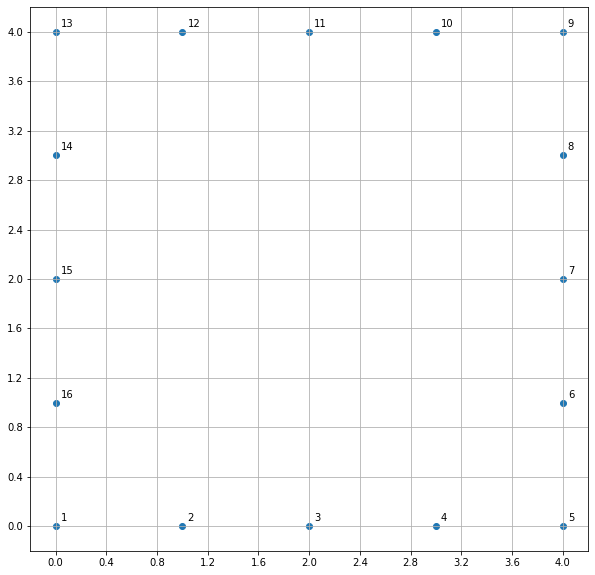

In [110]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
s = max (max(xs),max(ys))
m = min (min(xs),min(ys))
d = 5
SIZE = 10
plt.grid()

#cool one liner!
#plt.scatter(*zip(*stations_coord))
for mykey in dict_labels.keys():
  ax.set_xticks(np.arange(m-10,+s+10,s/10))
  ax.set_yticks(np.arange(m-10,+s+10,s/10))
  dx,dy = d,d
  xs_i,ys_i= mykey
  txt = dict_labels[mykey]
  plt.annotate(txt, 
                (xs_i,ys_i),
                textcoords="offset points", # how to position the text
                xytext=(dx,dy), # distance from text to points (x,y)
                size = SIZE
              )
plt.scatter(xs, ys)
plt.show()

initial random path [9, 11, 0, 13, 5, 8, 2, 1, 14, 4, 7, 10, 12, 3, 6, 9]
initial cost : 45.48


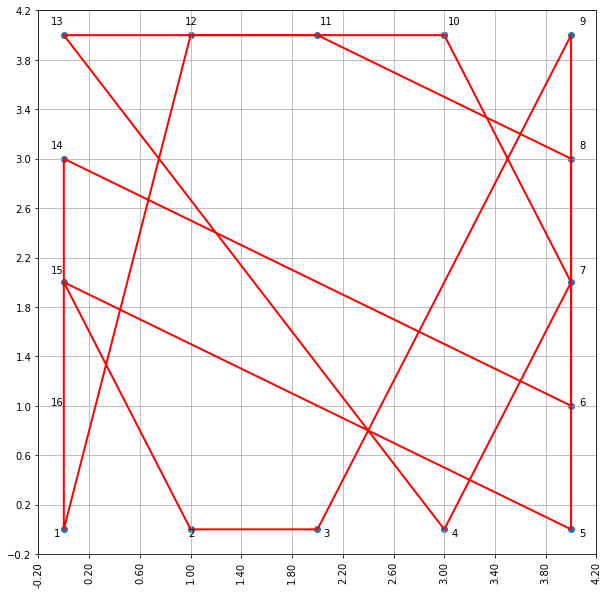

In [111]:
# random input
np.random.seed(seed = 42)
initial_path = list(np.random.permutation(len(labels_coord)-1) )

# the route must end where it started
first_element = initial_path[0]
initial_path.append(first_element)

print ("initial random path",initial_path)
initial_cost, weights_list = Euclidean_path_cost(initial_path, coord = coordinates)
#print ("costs: ",weights_list)
print ("initial cost : %.2f"%initial_cost)

#print initial solution
print_path_TSP(initial_path,coordinates,"always",h=10,l=10, Dlab = 7, Slab = 10, dict_labels = dict_labels)

initial random path :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1]
initial cost : 16.00


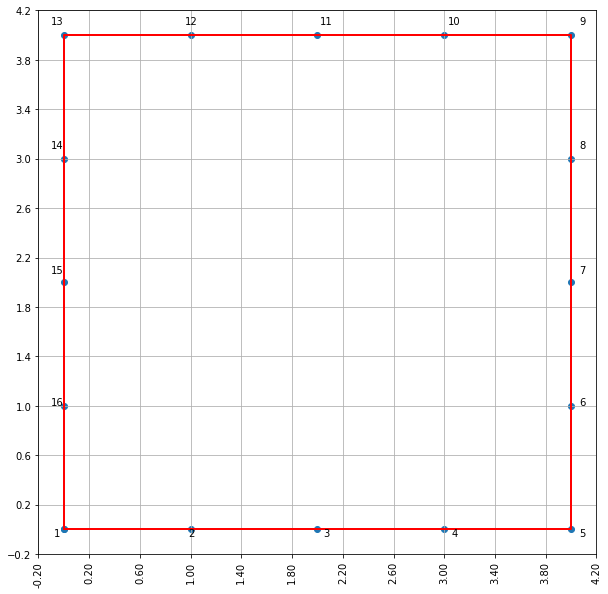

In [112]:

initial_path = list(range(0,n))
# the route must end where it started
first_element = initial_path[0]
initial_path.append(first_element)

print_path = [i +1 for i in initial_path]
print ("initial random path : ",print_path)

initial_cost, weights_list = Euclidean_path_cost(initial_path, coord = coordinates)
#print ("costs: ",weights_list)
print ("initial cost : %.2f"%initial_cost)

#print initial solution
print_path_TSP(initial_path,coordinates,"always",h=10,l=10, Dlab = 7, Slab = 10, dict_labels = dict_labels)

In [113]:
print ( list(range( int((5*n/8)-2),int((3*n/8)) ))  )

[]


subpath1 len: 4 : [1, 2, 3, 4] 
subpath2 len: 3 : [5.0, 10.0, 9.0] 
subpath3 len: 2 : [8, 7] 
subpath4 len: 2 : [6.0, 11.0] 
subpath5 len: 4 : [12, 13, 14, 15] 
path: [1, 2, 3, 4, 5, 10, 9, 8, 7, 6, 11, 12, 13, 14, 15, 1]
initial cost : 21.73


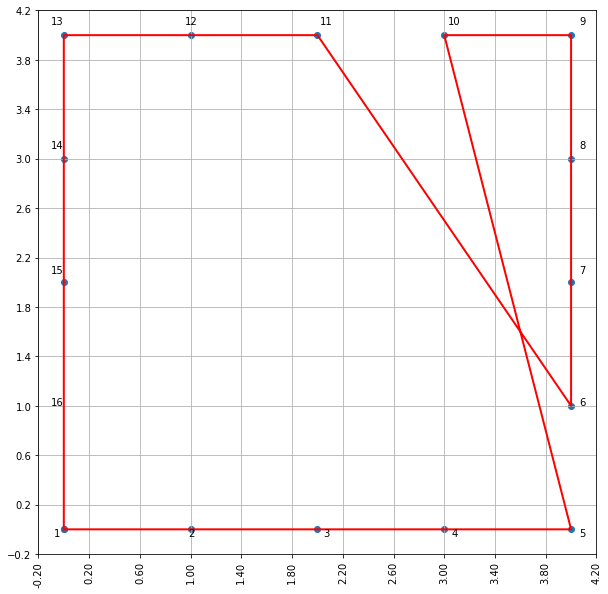

In [114]:
# given path

subpath1 = list(range(1,int((3*n/8)-1)))
subpath2 = [((3*n/8)-1),(5*n/8),(5*n/8)-1]
subpath3 = list(range(int((5*n/8)-2),int(3*n/8),-1))
subpath4 = [(3*n/8),(5*n/8)+1]
subpath5 = list(range(int((5*n/8)+2),n))

print ("subpath1 len: %s : %s " %(len(subpath1),subpath1))
print ("subpath2 len: %s : %s " %(len(subpath2),subpath2))
print ("subpath3 len: %s : %s " %(len(subpath3),subpath3))
print ("subpath4 len: %s : %s " %(len(subpath4),subpath4))
print ("subpath5 len: %s : %s " %(len(subpath5),subpath5))

# put together paths
path = subpath1+subpath2+subpath3+subpath4+subpath5

#append first element as last
first_element = path[0]
path.append(first_element)

# make it all integers
path = [int(i) for i in path]

# print as 1 to n+1
print ("path: %s" %(path))

# reset to 0 to n 
path = [int(i-1) for i in path]

initial_cost, weights_list = Euclidean_path_cost(path, coord = coordinates)
#print ("costs: ",weights_list)
print ("initial cost : %.2f"%initial_cost)

#print initial solution
print_path_TSP(path,coordinates,"always",h=10,l=10, Dlab = 7, Slab = 10, dict_labels = dict_labels)

# 8- Evolutionary algorithms

In [167]:
import re
import random
import numpy as np
import pandas as pd
from itertools import cycle, islice, dropwhile
import collections

## Definitions Theory

* **Search space $S .$**

 A typically finite set, in which certain solution (e. g., of optimal quality) are sought. Examples:
  - $\{0,1\}^{n}$, all bit strings of length $n$. In this way, an assignment of truth values to $n$ boolean variables can be coded.
  - $\Pi_{n}:=$ set of all permutations on $\{1, \ldots, n\} .$ In this way, a solution to the TSP can be coded.

* **Fitness function $f$.**

 Maps $x \in S \mapsto f(x) \in \mathbb{R},$ i. e., returns a value for every search point. Examples:
  - $f:\{0,1\}^{n} \rightarrow \mathbb{R}$ returns the number of satisfied clauses w. r. t. the MAX-3-SAT problem, using the search space $\{0,1\}^{n}$ as described above.
  - $f: \Pi_{n} \rightarrow \mathbb{R}$ returns the length of a TSP-tour.

## Mutations Theory
* **Bit-flip mutation** 
  * Given $x=\left(x_{1}, \ldots, x_{n}\right) \in\{0,1\}^{n},$ 
  * an index $k \in\{1, \ldots, n\}$ is picked uniformly at random.
  * $x^{\prime}$ is obtained by flipping bit $k$ in $x,$ formally
$$
x^{\prime}=\left(x_{1}, \ldots, x_{k-1}, 1-x_{k}, x_{k+1}, \ldots, x_{n}\right)
$$
* **Swap mutation** : not great for TSP
  * Given $x=\left(i_{1}, \ldots, i_{n}\right) \in \Pi_{n},$ 
  * two indices $k<\ell \in\{1, \ldots, n\}$ are picked
u. a. r. and 
  * $x^{\prime}$ is obtained by swapping the elements at these two places. 
  $$x^{\prime}=\left(i_{1}, \ldots, i_{k-1}, i_{\ell}, i_{k+1}, \ldots, i_{\ell-1}, i_{k}, i_{\ell+1}, \ldots, i_{n}\right)$$
* **Jump**  : better then swap for TSP 
  * Pick two indices $k<\ell$ 
  * let element at pos. $k$ jump to pos. $\ell,$ 
  * shift intermediate values to the left: 
  > (1,3,4,6,2,5)$\mapsto$(1,4,6,2,3,5) for $k=2, \ell=5$
* **2-OPT**: very good for TSP , see chapter TSP
  * Pick two edges
  * connect their endpoints "crossing over"

## Cross over Theory 


* **Order Crossover** $(\mathrm{OX}):$ Choose $k, \ell \in\{1, \ldots, n\},$ where $k<\ell,$ u. a. r. Take $\left(x_{k}, \ldots, x_{\ell}\right)$ from the first parent. Remaining positions, starting from $\ell+1,$ filled consecutively from second parent (also from $\ell+1$ ), skipping any occurrences of elements from $x_{k}, \ldots, x_{\ell}$. If an element of y is already present in x, then take the index of the position where it appears in x, move to y with the index and take that value.

* **Partially Matched Crossover (PMX)** Starts out as OX (take $\left(x_{k}, \ldots, x_{\ell}\right)$ from first parent). Remaining elements added from second parent by preserving absolute positions as far as possible. Elements $j$ from the second parent that cannot be put at the same position are filled with the elements that stand at the same position in $y$ as $j$ in $x$ (repeating the procedure until a valid element is found).

* **Cycle Crossover** $(\mathrm{CX})$ : tries to maintain many absolute positions of the first parent by identifying a "cycle" through the parents. Consider the two parents to define a mapping $f$ on the indices: $f\left(x_{i}\right):=y_{i}$ for $i \in\{1, \ldots, n\}$ 
Start by copying $x_{1}$ to $z_{1} .$ Then the element of $x$ that equals $y_{1}=f\left(x_{1}\right),$ say $x_{j},$ is copied to $z$ at the same position $j$. Proceed by finding the element of $x$ equaling $f\left(x_{j}\right)$ etc. until we hit an element that has already been copied to $z$. The remaining positions are filled with the missing elements according to the order in $y$.


## Best Crossover Operations

* **Partition Crossover (PX)**  PX can be implemented to run in time O(n).
  * Step 1: take the union of the tours given by the parents. Find edges common to both tours.
  * Find a cut through exactly two common edges. 
    * These edges are called cut edges. 
    * If impossible: crossover not feasible, return parents.
  * FIRST CHILD Given the two edges e and e' from the cut
    * start out at e
    * follow the tour from the first parent up to e'
    * then the tour from the second one. 
  * SECOND CHILD Other child is created in the opposite way.
    * start out at e'
    * follow the tour from the second parent up to e
    * then the tour from the first one. 

* **Generalized Partition Crossover (GPX)** GPX generalizes PX by considering possibly more than one cut:
    * Take out all common edges: the graph falls apart into connected components.
    * Determine for each component the shortest path through the component, again based on
all edges from the two parents.
    * Concatenation of these tours then gives rise to an offspring.


## **Algorithm $5.21[(1+1)$ Evolutionary Algorithm $((1+1) \mathrm{EA})]$** 
1. $t:=0 .$ Choose $x=\left(x_{1}, \ldots, x_{n}\right) \in\{0,1\}^{n}$ uniformly at random.
2. $y:=x$
3. Independently for each bit in $y$ : flip it with probability $\frac{1}{n}$ (mutation).
4. If $f(y) \geq f(x)$ Then $x:=y$ (selection).
5. $t:=t+1 .$ Continue at line 2 .

In [168]:
def flip(val):
  if val == 0:
      flipped = 1
  else:
      flipped = 0
  return flipped

In [169]:
def most_frequent(List): 
    return max(set(List), key = List.count)

In [170]:
#(1+1) Evolutionary Algorithm ((1+1) EA)
def EA_one_plus_one(n,x,t,t_max = 10, print_stat = True):

  fit_x = fun(x)
  """
  n = dimension of the string 
  t_max = number of generations
  """
  # set a max number of generations
  while (t< t_max) and (fit_x < n):

    #generate the probability of flipping for each element of x
    P = [round(random.uniform(0,1), 2) for k in x]

    # flipping each element independently with probability 1/n
    flip_statement = [True if p <=(1/n) else False for p in P]

    #EA main
    y = [flip(val) if flip_statement[i]== True else val for i,val in enumerate(x)]

    # print process
    if print_stat == True:
      print ("")
      print ("%s)  y: %s "%(t,y))

    # evaluate fit of y
    fit_y = fun(y)
    fit_x = fun(x)

    # if it is a better fit update x
    if fit_y >fit_x:
      x = y
      if print_stat == True:
        print("found better fit: %s" %fit_y)

    # increase t
    t = t+1

  if fun(x) == n:
    opt = True
  else:
    opt = False
  

  return x, opt,t


## **Algorithm $5.20[$ Randomized Local Search (RLS) ]**
1. $t:=0 .$ Choose $x=\left(x_{1}, \ldots, x_{n}\right) \in\{0,1\}^{n}$ uniformly at random.
2. $y:=x$
3. Choose one bit in $y$ uniformly at random and flip it (mutation).
4. If $f(y) \geq f(x)$ Then $x:=y$ (selection).
5. $t:=t+1$. Continue at line 2 .

## initialize EA1+1

In [172]:
n = 8
num_trials = 10000

##uncomment this to check how the duration of the evolution impacts the success probabilities
#K = [1,2,3,4,5]

##uncomment this to check how long it actually takes to get a success, depending on the initial status
# put some ridiculously high number, sort of infinte (and hope it doesnt crash)
K = [10**8]

# definition of function to optimize
def fun(x):
  return sum(x)


#x
#x = random.choices([0,1],k =n)
x = [0]*n

# intial fit
fit_x = fun(x)
print ("x: %s" %x)
print ("initial fit: %s " %fit_x)

x: [0, 0, 0, 0, 0, 0, 0, 0]
initial fit: 0 


In [173]:
# test the evolutionary algorithm 
# how many times does it succeed in relation to the duration t_max?
# and in relation to the initial fit? 

dictionary_fit = dict()
for fit in list(range(n)):
  dictionary_opt = dict()
  for k in K:
    success = 0
    T = []
    for j in list(range(num_trials)):
      t = 0

      #EA 1+1
      y,opt,t = EA_one_plus_one(n,x,t,t_max = n*k, print_stat = False)

      if opt == True:
        success +=1
      T.append(t)

    dictionary_opt[k] = (success/num_trials,T)
  dictionary_fit[fit] = dictionary_opt

  print ("x: %s,  initial fit: %s" %(x, fun(x)))
  #print (*dictionary_opt.items(), sep = '\n')
  for k,v in dictionary_opt.items():
    rate = v[0]
    T = v[1]
    minT = min(T)
    maxT = max(T)
    expectT = sum(T)/len(T)
    freq= most_frequent(T)
    print ("duration:n*%s, success rate: %s, min_T: %s, max_T: %s, average_T: %s , most_frequent:%s" %(k,rate,minT,maxT,expectT,freq))
  print ("-"*40)
  x = [flip(val) if i == fit else val for i,val in enumerate(x)]

x: [0, 0, 0, 0, 0, 0, 0, 0],  initial fit: 0
duration:n*100000000, success rate: 1.0, min_T: 5, max_T: 211, average_T: 41.5658 , most_frequent:29
----------------------------------------
x: [1, 0, 0, 0, 0, 0, 0, 0],  initial fit: 1
duration:n*100000000, success rate: 1.0, min_T: 3, max_T: 194, average_T: 40.4689 , most_frequent:24
----------------------------------------
x: [1, 1, 0, 0, 0, 0, 0, 0],  initial fit: 2
duration:n*100000000, success rate: 1.0, min_T: 3, max_T: 244, average_T: 39.4965 , most_frequent:29
----------------------------------------
x: [1, 1, 1, 0, 0, 0, 0, 0],  initial fit: 3
duration:n*100000000, success rate: 1.0, min_T: 3, max_T: 219, average_T: 38.3601 , most_frequent:21
----------------------------------------
x: [1, 1, 1, 1, 0, 0, 0, 0],  initial fit: 4
duration:n*100000000, success rate: 1.0, min_T: 2, max_T: 205, average_T: 36.2485 , most_frequent:21
----------------------------------------
x: [1, 1, 1, 1, 1, 0, 0, 0],  initial fit: 5
duration:n*100000000

## Randomized Local Search RLS

In [171]:
#Randomized Local Search (RLS)(1+1)
def RLS(n,x,t,t_max = 10, print_stat = True):

  """
  n = dimension of the search space
  t_max = number of generations, this is a safety tool for now
  """
  fit_x = fun(x)
  # set a max number of generations
  while (t< t_max) and (fit_x < n):

    # choose a random bit 
    choice = random.choice(list(range(n)))

    #flip the random bit
    y = [flip(val) if i == choice else val for i,val in enumerate(x)]

    # print process
    if print_stat == True:
      print ("")
      print ("%s)  y: %s "%(t,y))

    # evaluate fit of y
    fit_y = fun(y)
    fit_x = fun(x)

    # if it is a better fit update x
    if fit_y >fit_x:
      x = y
      if print_stat == True:
        print("found better fit: %s" %fit_y)

    # increase t
    t = t+1

  if fun(x) == n:
    opt = True
  else:
    opt = False
  

  return x, opt,t


In [174]:
# just a refresh
x = [0]*n

n = 8
num_trials = 10000

##uncomment this to check how the duration of the evolution impacts the success probabilities
#K = [1,2,3,4,5]

##uncomment this to check how long it actually takes to get a success, depending on the initial status
# put some ridiculously high number, sort of infinte (and hope it doesnt crash)
K = [10**8]

In [175]:
# test the evolutionary algorithm 
# how many times does it succeed in relation to the duration t_max?
# and in relation to the initial fit? 

dictionary_fit = dict()
for fit in list(range(n)):
  dictionary_opt = dict()
  for k in K:
    T = []
    success = 0
    for j in list(range(num_trials)):
      t = 0

      #EA 1+1
      y,opt,t = RLS(n,x,t,t_max = n*k, print_stat = False)

      if opt == True:
        success +=1
      T.append(t)

    dictionary_opt[k] = (success/num_trials,T)
  dictionary_fit[fit] = dictionary_opt

  print ("x: %s,  initial fit: %s" %(x, fun(x)))
  #print (*dictionary_opt.items(), sep = '\n')
  for k,v in dictionary_opt.items():
    rate = v[0]
    T = v[1]
    minT = min(T)
    maxT = max(T)
    expectT = sum(T)/len(T)
    freq= most_frequent(T)
    print ("duration:n*%s, success rate: %s, min_T: %s, max_T: %s, average_T: %s , most_frequent:%s" %(k,rate,minT,maxT,expectT,freq))

  print ("-"*40)
  x = [flip(val) if i == fit else val for i,val in enumerate(x)]

x: [0, 0, 0, 0, 0, 0, 0, 0],  initial fit: 0
duration:n*100000000, success rate: 1.0, min_T: 9, max_T: 86, average_T: 22.6958 , most_frequent:17
----------------------------------------
x: [1, 0, 0, 0, 0, 0, 0, 0],  initial fit: 1
duration:n*100000000, success rate: 1.0, min_T: 8, max_T: 85, average_T: 21.7289 , most_frequent:16
----------------------------------------
x: [1, 1, 0, 0, 0, 0, 0, 0],  initial fit: 2
duration:n*100000000, success rate: 1.0, min_T: 7, max_T: 82, average_T: 20.6752 , most_frequent:15
----------------------------------------
x: [1, 1, 1, 0, 0, 0, 0, 0],  initial fit: 3
duration:n*100000000, success rate: 1.0, min_T: 6, max_T: 77, average_T: 19.325 , most_frequent:14
----------------------------------------
x: [1, 1, 1, 1, 0, 0, 0, 0],  initial fit: 4
duration:n*100000000, success rate: 1.0, min_T: 5, max_T: 98, average_T: 17.5438 , most_frequent:12
----------------------------------------
x: [1, 1, 1, 1, 1, 0, 0, 0],  initial fit: 5
duration:n*100000000, succ

## Functions

### mutations functions

In [176]:
def bitflip_mutation(x):

  # check that all elements of x are 0s and 1s
  check = [element for element in x if not element in [0,1]]
  if len(check)>0:
    print ("the input string must have bits only ")
    return x
  else:
    k = random.choice(range(len(x)))
    current = x[k]
    if current == 0:
      flipped = 1
    else:
      flipped = 0
    x[k] = flipped
  return x

In [177]:
# test
x = [0,1,0,0,0,1,1,0,1]
z = bitflip_mutation(x)
z

[0, 1, 0, 0, 0, 1, 1, 0, 0]

In [178]:
def swap_mutation(x):
  # check if any element is repeated
  myset = set(x)
  n = len(x)
  idx = list(range(n))
  #print (myset)
  if len(list(myset)) != n:
    print (" there are repeated elements in the list given")
    return x
  else:
    sampling = random.choices(idx,k= 2)
    if sampling[0]<sampling[1]:
      k,l = sampling[0],sampling[1]
    else:
      k,l = sampling[1],sampling[0]
    child =x.copy()
    x[k],x[l] = x[l],x[k]
  return x 

In [179]:
# test
x = [6,1,8,4,3,7,2,9]
z = swap_mutation(x)
z

[2, 1, 8, 4, 3, 7, 6, 9]

In [180]:
def jump(x, print_statement = False, k = None, l = None):
  print ("")
  print ("boooooing")
  if k is None:
    random.seed(a=17)
    sampling = random.choices(idx,k = 2)
    if sampling[0]<sampling[1]:
      k,l = sampling[0],sampling[1]
    else:
      k,l = sampling[1],sampling[0]

  print ("k: %s; l:%s"%(k,l))
  print ("x: ",x)

  element = x.pop(k)
  x.insert(l,element)
  #print(x)
  return x 

In [181]:
#jump
#example
sx = "1, 3, 4, 6, 2, 5"
#x = [int(item) for item in x if item.isdigit()]
x = [int(x) for x in sx.split(",")]

n = len(x)
child = [None] * n
d = np.row_stack([x,child])
df = pd.DataFrame(data=d,index = ["parent x", "child1"])
child = jump(x, print_statement = False, k= 1, l = 4)
df.loc['child1'] = child  # adding a row
df


boooooing
k: 1; l:4
x:  [1, 3, 4, 6, 2, 5]


,0,1,2,3,4,5
parent x,1,3,4,6,2,5
child1,1,4,6,2,3,5


### cross overs functions

In [182]:
def uniform_crossover(x,y,child, print_statement = False):
  random.seed(a=17)
  n = len(x)
  idx = [0,1]
  sampling = random.choices(idx,k= n)
  if print_statement== True:
    print (x)
    print (y)
    print (sampling)
  child = [x[i] if bit == 0 else y[i] for i,bit in enumerate(sampling) ]
  return child

In [183]:
#uniform crossover
#example
x = "(1, 2, 3, 5, 4, 6, 7, 8, 9)"
y = "(4, 5, 2, 1, 8, 7, 6, 9, 3)"
x = [ int(item) for item in x if item.isdigit()]
y = [ int(item) for item in y if item.isdigit()]
n = len(x)
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = uniform_crossover(x,y,child, print_statement = False)
child2 = uniform_crossover(y,x,child, print_statement = False)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df

,0,1,2,3,4,5,6,7,8
parent x,1,2,3,5,4,6,7,8,9
parent y,4,5,2,1,8,7,6,9,3
child1,4,5,2,5,8,7,6,8,9
child2,1,2,3,1,4,6,7,9,3


In [184]:
# OX implementation
def OX_crossover(x,y,child, print_statement = False, k = None, l = None):
  print ("")
  print ("appling order crossover (OX)")
  if k is None:
    random.seed(a=17)
    sampling = random.choices(idx,k = 2)
    k,l = sampling[0], sampling[1]
    while k>=l:
      sampling = random.choices(idx,k = 2)
      k,l = sampling[0], sampling[1]

  print ("k: %s; l:%s"%(k,l))

  print ("x: ",x)
  print ("y: ",y)

  #take x_k to x_l from first parent
  child[(k-1):(l+0)] = x[(k-1):(l+0)]
  print (child)

  # find the indexes that are missing 
  missing_indexes = [index for index, element in enumerate(child) if element is None]
  if print_statement == True:
    print ("missing indexes in child" ,missing_indexes)

  # create a cycle for list missing_indexes
  index_cycle = cycle(missing_indexes)
  y_cycle = cycle(y)

  start = l
  if print_statement == True:
    print ("")
    print ("Start: ",start)
  skipped = dropwhile(lambda x: x != start, index_cycle)  # drop the values until x=index
  y_skipped = dropwhile(lambda x: x != y[start], y_cycle)  # drop the values until x=index

  sliced = islice(skipped, None, 4000)
  y_sliced = islice(y_skipped, None, 4000)

  while len(missing_indexes) >0:
    original_proposed_idx = next(sliced)
    proposed = next(y_sliced)
    if print_statement == True:
      print ("")
      print ("next proposed y value: %s " %(proposed))
    while proposed in child:
      if print_statement == True:
        print ("%s is already present" %proposed)
      proposed =next(y_sliced)
      if print_statement == True:
        print ("next proposed y value: %s " %(proposed))
    if print_statement == True:
      print ("proposed value accepted")
    child[original_proposed_idx] = proposed
    #print (child)
    missing_indexes = [index for index, element in enumerate(child) if element is None]
  return child

In [185]:
# PMX implementation
def PMX_crossover(x,y,child, print_statement = False, k = None, l = None):
  print ("")
  print ("appling Partially Matched Crossover (PMX)")
  if k is None:
    random.seed(a=17)
    sampling = random.choices(idx,k = 2)
    k,l = sampling[0], sampling[1]
    while k>=l:
      sampling = random.choices(idx,k = 2)
      k,l = sampling[0], sampling[1]

  print ("k: %s; l:%s"%(k,l))

  print ("x: ",x)
  print ("y: ",y)

  #take x_k to x_l from first parent
  child[(k-1):(l+0)] = x[(k-1):(l+0)]
  print (child)

  # find the indexes that are missing 
  missing_indexes = [index for index, element in enumerate(child) if element is None]
  if print_statement == True:
    print ("missing indexes in child" ,missing_indexes)

  # create a cycle for list missing_indexes
  index_cycle = cycle(missing_indexes)
  y_cycle = cycle(y)

  start = l
  if print_statement == True:
    print ("")
    print ("Start: ",start)
  skipped = dropwhile(lambda x: x != start, index_cycle)  # drop the values until x=index
  y_skipped = dropwhile(lambda x: x != y[start], y_cycle)  # drop the values until x=index

  sliced = islice(skipped, None, 400)
  y_sliced = islice(y_skipped, None, 400)

  while len(missing_indexes) >0:
    original_proposed_idx = next(sliced)
    proposed = next(y_sliced)
    if print_statement == True:
      print ("")
      print ("next proposed y value: %s " %(proposed))
    while proposed in child:
      if print_statement == True:
        print ("%s is already present" %proposed)
      
      #find proposed in x and take the index
      index_x = x.index(proposed)
      #take the correspondent index_x
      proposed = y[index_x]
      #proposed =next(y_sliced)
      if print_statement == True:
        print ("next proposed y value: %s " %(proposed))
    if print_statement == True:
      print ("proposed value accepted")
    child[original_proposed_idx] = proposed
    #print (child)
    missing_indexes = [index for index, element in enumerate(child) if element is None]
  return child

In [186]:
# CX implementation
def CX_crossover(x,y,child, print_statement = False):
  print ("")
  print ("appling Cycle Crossover (CX)")

  # start by copying child 
  #child = x.copy()
  #y_copy = y.copy()
  positions = []
  print ("x: ",x)
  print ("y: ",y)

  child_index = 0

  # take value from x
  value = x[child_index]

  while not value in child:  
    #assign value to child from x in the same position
    child[child_index] = value
    if print_statement == True:
      print (child_index, value)
    # find the value from y
    value = y[child_index]
    child_index = x.index(value) #find one index

  # find the indexes that are missing 
  missing_indexes = [index for index, element in enumerate(child) if element is None]

  for index in missing_indexes:
    child[index] = y[index]

  return child

In [187]:
def use_integers(list):
  return [int(x) for x in list]

In [188]:
def format_path(line,original):
  """
  lineformatted = format_line (line,original)
  """
  #print (" in blue filler numbers (the ...)")
  lineformatted = [Fore.WHITE + Back.BLUE + str(char) + Style.RESET_ALL if not char in original
                  else str(char) for char in line ]
  lineformatted = " ".join(lineformatted)
  return lineformatted

## Exercises

### input parents

In [193]:
sx= "7;6;9;8;10;15;12;2;3;13;5;1;14;11;4"
sy= "10;14;9;4;3;11;1;6;8;15;2;12;7;5;13"

x = [int(x) for x in sx.split(";")]
y = [int(x) for x in sy.split(";")]

k = 4
l = 10

n = len(x)
idx = list(range(n))

### run OX

In [194]:
#OX Cross over
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = OX_crossover(x,y,child,print_statement=False, k= k, l=l)
child2 = OX_crossover(y,x,child2,print_statement=False, k= k, l=l)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df


appling order crossover (OX)
k: 4; l:10
x:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
y:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
[None, None, None, 8, 10, 15, 12, 2, 3, 13, None, None, None, None, None]

appling order crossover (OX)
k: 4; l:10
x:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
y:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
[None, None, None, 4, 3, 11, 1, 6, 8, 15, None, None, None, None, None]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13
child1,11,1,6,8,10,15,12,2,3,13,7,5,14,9,4
child2,12,2,13,4,3,11,1,6,8,15,5,14,7,9,10


### run PMX

In [195]:
#PMX crossover
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = PMX_crossover(x,y,child,print_statement=False, k= k, l=l)
child2 = PMX_crossover(y,x,child2,print_statement=False, k= k, l=l)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df


appling Partially Matched Crossover (PMX)
k: 4; l:10
x:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
y:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
[None, None, None, 8, 10, 15, 12, 2, 3, 13, None, None, None, None, None]

appling Partially Matched Crossover (PMX)
k: 4; l:10
x:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
y:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
[None, None, None, 4, 3, 11, 1, 6, 8, 15, None, None, None, None, None]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13
child1,4,14,9,8,10,15,12,2,3,13,6,1,7,5,11
child2,7,2,9,4,3,11,1,6,8,15,5,12,14,13,10


### run CX

In [196]:
#CX crossover
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = CX_crossover(x,y,child, print_statement = False)
child2 = CX_crossover(y,x,child2, print_statement = False)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df


appling Cycle Crossover (CX)
x:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
y:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]

appling Cycle Crossover (CX)
x:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
y:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13
child1,7,6,9,8,10,15,1,2,3,13,5,12,14,11,4
child2,10,14,9,4,3,11,12,6,8,15,2,1,7,5,13


# 9- Chernoff bounds

Finally, very strong deviation bounds can be obtained in the special case that a random variable is given as the sum of $n$ simple random variables. More precisely, we state Chernoff's inequality: Let $X_{1}, \ldots, X_{n}$ be independent \{0,1\} -random variables with 

$$p_{i}:=\mathbf{P}\left[X_{i}=1\right], 1 \leq i \leq n .$$ 

For $$X:=\sum_{i=1}^{n} X_{i}$$
and 
 $$\mu:=\boldsymbol{E}[X]=\sum_{i=1}^{n} p_{i}$$

it holds
$$
\begin{array}{l}
P_1: \mathbf{P}[X<(1-\delta) \mu]<e^{-\mu \delta^{2} / 2} \text { for } 0<\delta<1 \\
P_1: \mathbf{P}[X<Left]<e^{-\mu \delta^{2} / 2} \text { for } 0<\delta<1 \\
\\
P_2: \mathbf{P}[X>(1+\delta) \mu]<e^{-\mu \delta^{2} / 3} \text { for } 0<\delta<1\\
P_2: \mathbf{P}[X> Right]<e^{-\mu \delta^{2} / 3} \text { for } 0<\delta<1
\end{array}
$$ 

In [208]:
import math

n = 10000

L = 400
R = 600

p_i = [1/2]*n # success probability, probability of being =1

mu = sum(p_i)# expected value of random variable E(X)
print("expected value: ",mu)

#[Left,Right]
sigma = (mu-L)/mu
print ("sigma: ", sigma)
## or same: 
#sigma = (R-mu)/mu
#print (sigma)

P_1 = math.exp(-mu*(sigma*sigma)/2)# probability that less than Left 
print ("probability that less than %s: %s " %(L,P_1))

P_2 = math.exp(-mu*(sigma*sigma)/3)# probability that more than Right 
print ("probability that more than %s: %s " %(R,P_2))

P_3 = 1-P_2 # probability that less than right
print ("probability that less than %s: %s " %(R,P_3))

P_inrange = P_3-P_1
print ("probability that %s<= number of successses <= %s : %s" %(L,R,P_inrange))

expected value:  5000.0
sigma:  0.92
probability that less than 400: 0.0 
probability that more than 600: 0.0 
probability that less than 600: 1.0 
probability that 400<= number of successses <= 600 : 1.0
